In [1]:
# Major libraries
import scipy
import bottleneck 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Mining / Data Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

# Supervised learning
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [2]:
dataset = pd.read_csv("diabetic_data.csv", na_values="?")

C:\Users\CHANDIMA\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [4]:
print(dataset.shape)

(101766, 50)


In [5]:
print(dataset.columns)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_rosiglitazone',
       'metformin_pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [6]:
print(dataset.dtypes)

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [7]:
# Print contents of dataset
dataset.head(5)  

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [8]:
dataset.tail(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),NaN,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [9]:
print(dataset.isnull().sum()) # How many missing values

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [10]:
# how many features have missing values, and how many values they're missing:
def percent_null(data):
    # Returns a Pandas series of what percentage of each feature of 'data' contains NaN values
    pc_null = data.apply(pd.Series.isnull).apply(lambda x: 100*round(len(x[x==True])/len(x), 4))
    return pc_null[pc_null!=0]
percent_null(dataset)

race                  2.23
weight               96.86
payer_code           39.56
medical_specialty    49.08
diag_1                0.02
diag_2                0.35
diag_3                1.40
dtype: float64

In [11]:
#Remove useless features
dataset.drop(['encounter_id', 'patient_nbr', 'race', 'gender', 'weight', 'admission_type_id', 'payer_code', 'medical_specialty', 'num_procedures', 'number_outpatient', 'number_emergency', 'number_inpatient', 'max_glu_serum', 'A1Cresult',  'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',  'glyburide_metformin', 'glipizide_metformin', 'glimepiride_pioglitazone', 'metformin_rosiglitazone', 'metformin_pioglitazone', 'change', 'diabetesMed'], axis=1, inplace=True)

In [12]:
dataset.shape

(101766, 11)

In [13]:
percent_null(dataset)

diag_1    0.02
diag_2    0.35
diag_3    1.40
dtype: float64

In [14]:
print(dataset.isnull().sum())

age                            0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_medications                0
diag_1                        21
diag_2                       358
diag_3                      1423
number_diagnoses               0
readmitted                     0
dtype: int64


In [15]:

finalDataset = dataset.dropna()

In [16]:
finalDataset.shape

(100244, 11)

In [17]:
percent_null(finalDataset)

Series([], dtype: float64)

In [18]:
# ICD9 Codes for diag_1, diag_2 and diag_3
def ICD9_classifier(diagnoses):
    # Returns a series of strings corresponding to type of ICD9 diagnosis
    # diagnoses is a list
    gr_diagnoses = diagnoses.copy()
    icd9_dct = {
                'Infectious':(1, 139),
                'Neoplasmic':(140,239),
                'Hormonal':(240, 279),
                'Blood':(280,289),
                'Mental':(290,319),
                'Nervous':(320,359),
                'Sensory':(360,389),
                'Circulatory':(390,459),
                'Respiratory':(460,519),
                'Digestive':(520,579),
                'Genitourinary':(580,629),
                'Childbirth':(630,679),
                'Dermatological':(680,709),
                'Musculoskeletal':(710,739),
                'Congenital':(740,759),
                'Perinatal':(760,779),
                'Miscellaneous':(780,799),
                'Injury':(800,999)
               }
    for i, diagnosis in enumerate(diagnoses):
        if (str(diagnoses[i])[0] == 'E') or (str(diagnoses[i])[0] == 'V'):
            gr_diagnoses[i] = 'Accidental'
        elif (str(diagnoses[i]).lower() == 'nan'):
            gr_diagnoses[i] = 'NaN'
        else:
            for key, icd_range in icd9_dct.items():
                if (int(float(diagnoses[i])) >= icd_range[0]) and (int(float(diagnoses[i])) <= icd_range[1]):
                    gr_diagnoses[i] = key
    return gr_diagnoses

In [19]:
d1 = ICD9_classifier(finalDataset.diag_1.values)
d2 = ICD9_classifier(finalDataset.diag_2.values)
d3 = ICD9_classifier(finalDataset.diag_3.values)


finalDataset.diag_1 = d1
finalDataset.diag_2 = d2
finalDataset.diag_3 = d3

C:\Users\CHANDIMA\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [20]:
finalDataset.head(5)

,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,readmitted
1,[10-20),1,7,3,59,18,Hormonal,Hormonal,Hormonal,9,>30
2,[20-30),1,7,2,11,13,Childbirth,Hormonal,Accidental,6,NO
3,[30-40),1,7,2,44,16,Infectious,Hormonal,Circulatory,7,NO
4,[40-50),1,7,1,51,8,Neoplasmic,Neoplasmic,Hormonal,5,NO
5,[50-60),1,2,3,31,16,Circulatory,Circulatory,Hormonal,9,>30


In [21]:
# Label-encode age feature to an integer in the center of the raw bin
finalDataset.age = (LabelEncoder().fit_transform(finalDataset.age)*10) + 5

# Categorical data should be encoded
lb = LabelEncoder()
finalDataset['diag_1'] = lb.fit_transform(finalDataset['diag_1']) 
finalDataset['diag_2'] = lb.fit_transform(finalDataset['diag_2'])
finalDataset['diag_3'] = lb.fit_transform(finalDataset['diag_3'])
finalDataset['readmitted'] = lb.fit_transform(finalDataset['readmitted'])

C:\Users\CHANDIMA\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\CHANDIMA\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\CHANDIMA\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/panda

In [22]:
finalDataset.tail(5) 

,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,readmitted
101761,75,3,7,3,51,16,8,11,3,9,1
101762,85,4,5,5,33,18,6,8,12,9,2
101763,75,1,7,1,53,9,9,7,11,13,2
101764,85,3,7,10,45,21,10,1,10,9,2
101765,75,1,7,6,13,3,6,6,12,9,2


In [23]:
num_features = finalDataset.columns

# Remove outliers by class
for response in finalDataset.readmitted.unique(): # For each readmission response
    response_df = finalDataset[finalDataset.readmitted==response] # For all samples that meet the readmission criteria
    for column in response_df[num_features].columns: # Iterate through each feature of the sample
        Q1 = response_df[column].quantile(0.25)
        Q3 = response_df[column].quantile(0.75)
        IQR = Q3-Q1
        if IQR > 0: # And remove features that are outside of Q1 - 1.5IQR or Q3 + 1.5IQR
            response_df = response_df[(response_df[column] > Q1-(1.5*IQR)) & (response_df[column] < Q3+(1.5*IQR))]
            finalDataset = finalDataset.drop(finalDataset[finalDataset.readmitted==response].index, axis=0)
            finalDataset = finalDataset.append(response_df)

In [24]:
finalDataset.shape

(67983, 11)

In [25]:
X = finalDataset.iloc[:, :-1].values
y = finalDataset.iloc[:, 10].values


In [26]:
X

array([[55,  1,  2, ...,  3,  8,  9],
       [75,  1,  7, ..., 16,  8,  8],
       [45,  1,  7, ...,  3, 10,  9],
       ..., 
       [75,  1,  1, ...,  8,  8,  6],
       [75,  1,  7, ...,  3,  8,  5],
       [85,  1,  1, ...,  6,  8,  9]], dtype=int64)

In [27]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [28]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [29]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\CHANDIMA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [30]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None)

In [31]:
# Predicting the test results
y_pred = nb.predict(X_test)

# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)

cm1




array([[ 138,  827, 1021],
       [  34, 3067, 2315],
       [ 369, 3832, 5393]], dtype=int64)

In [32]:
target_names1 = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names = target_names1))

             precision    recall  f1-score   support

    class 0       0.26      0.07      0.11      1986
    class 1       0.40      0.57      0.47      5416
    class 2       0.62      0.56      0.59      9594

avg / total       0.51      0.51      0.49     16996



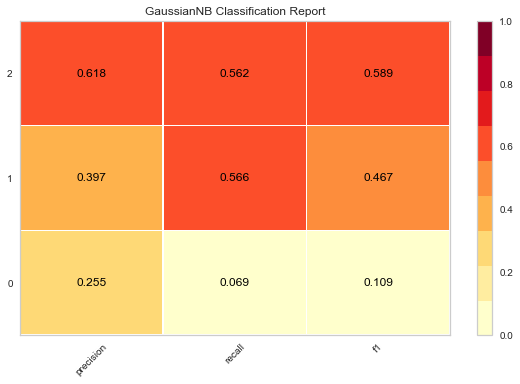

In [33]:
import yellowbrick as yb
from yellowbrick.classifier import ClassificationReport

nb = GaussianNB()
visualizer = ClassificationReport(nb)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()


In [34]:
#  Fitting classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [35]:
y_pred = knn.predict(X_test)

cm2 = confusion_matrix(y_test, y_pred)

cm2



array([[ 199,  608, 1179],
       [ 391, 2127, 2898],
       [ 657, 2810, 6127]], dtype=int64)

In [36]:
target_names2 = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names = target_names2))

             precision    recall  f1-score   support

    class 0       0.16      0.10      0.12      1986
    class 1       0.38      0.39      0.39      5416
    class 2       0.60      0.64      0.62      9594

avg / total       0.48      0.50      0.49     16996



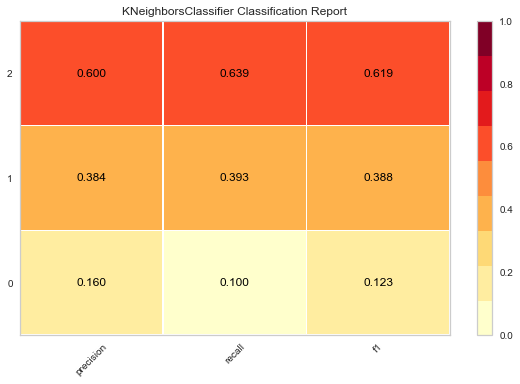

In [37]:
knn = KNeighborsClassifier()
visualizer = ClassificationReport(knn)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [38]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
y_pred = dt.predict(X_test)

cm3 = confusion_matrix(y_test, y_pred)

cm3


array([[ 305,  630, 1051],
       [ 635, 2065, 2716],
       [1198, 2884, 5512]], dtype=int64)

In [40]:
target_names3 = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names = target_names3))

             precision    recall  f1-score   support

    class 0       0.14      0.15      0.15      1986
    class 1       0.37      0.38      0.38      5416
    class 2       0.59      0.57      0.58      9594

avg / total       0.47      0.46      0.47     16996



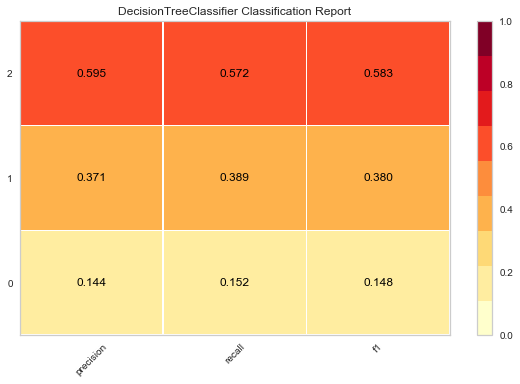

In [41]:
dt = DecisionTreeClassifier()
visualizer = ClassificationReport(dt)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [42]:
#Boosting - Ada Boost

adb = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators = 250, learning_rate = 1)
adb.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=250, random_state=None)

In [43]:
y_pred = adb.predict(X_test)

cm4 = confusion_matrix(y_test, y_pred)

cm4



array([[  25,  437, 1524],
       [  48, 1478, 3890],
       [  62, 1718, 7814]], dtype=int64)

In [44]:
target_names4 = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names = target_names4))


             precision    recall  f1-score   support

    class 0       0.19      0.01      0.02      1986
    class 1       0.41      0.27      0.33      5416
    class 2       0.59      0.81      0.68      9594

avg / total       0.48      0.55      0.49     16996



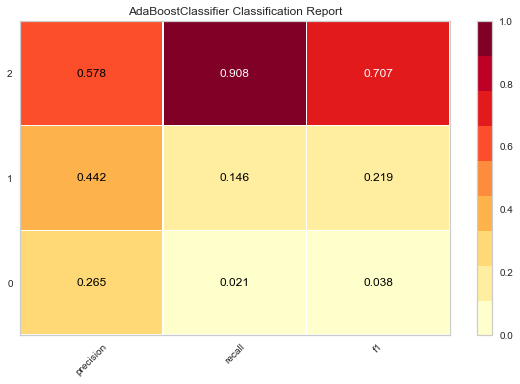

In [45]:
adb = AdaBoostClassifier()
visualizer = ClassificationReport(adb)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [46]:
gb = GradientBoostingClassifier(learning_rate=0.04, n_estimators=250)
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.04, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [47]:
y_pred = gb.predict(X_test)

cm5 = confusion_matrix(y_test, y_pred)

cm5

array([[  12,  206, 1768],
       [   4,  729, 4683],
       [   3,  644, 8947]], dtype=int64)

In [48]:
target_names5 = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names = target_names5))

             precision    recall  f1-score   support

    class 0       0.63      0.01      0.01      1986
    class 1       0.46      0.13      0.21      5416
    class 2       0.58      0.93      0.72      9594

avg / total       0.55      0.57      0.47     16996



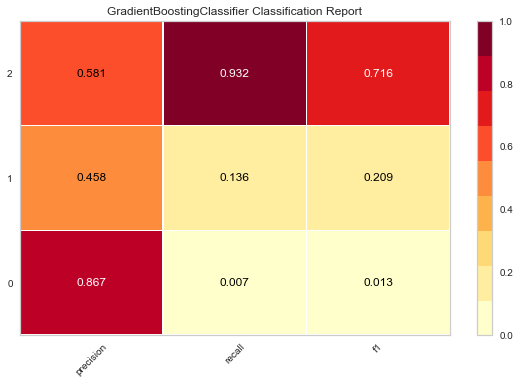

In [49]:
gb = GradientBoostingClassifier()
visualizer = ClassificationReport(gb)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [50]:
rf = RandomForestClassifier(n_estimators=250,oob_score = True, n_jobs = -1,random_state =50, max_features = "auto", max_depth=5 )
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=-1,
            oob_score=True, random_state=50, verbose=0, warm_start=False)

In [51]:
y_pred = rf.predict(X_test)

cm6 = confusion_matrix(y_test, y_pred)

cm6

array([[   8,    2, 1976],
       [   0,   18, 5398],
       [   0,    0, 9594]], dtype=int64)

In [52]:
target_names6 = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names = target_names6))

             precision    recall  f1-score   support

    class 0       1.00      0.00      0.01      1986
    class 1       0.90      0.00      0.01      5416
    class 2       0.57      1.00      0.72      9594

avg / total       0.72      0.57      0.41     16996



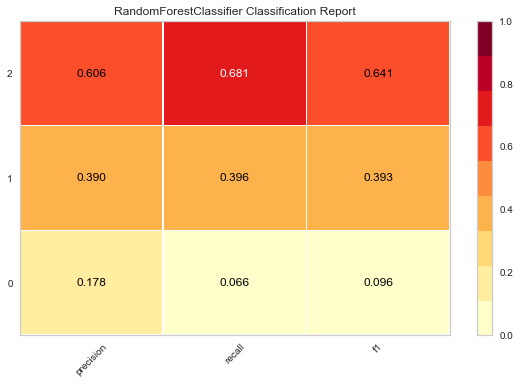

In [53]:
rf = RandomForestClassifier()
visualizer = ClassificationReport(rf)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()